<a href="https://colab.research.google.com/github/JF11579/New-Stuff/blob/main/WhichInvestHouseToBuy_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem:** I want to buy an investement property. But there are over 180 towns on Long Island and nearly a  million houses to choose from.  Where do I begin? Are some towns likely better rental investments than others and if so how can I identify them?

**Solution**: It turns out that there is a much greater variance in what someone will pay to buy a home than there is for what someone will pay to rent that home. We are comparing the variences not the absolute values.


1. Issue was to find the most profitable area to purchase investment properites.

2. I used R's ggplot to graph MLS data to discover if all towns offered the same return on investment (ROI).

3. The result of the project was a ROI of approximately 20% compared with a Long Island average closer to 9% or 6% if you remove the towns I found which are outliers. The R code that was instrumental is below.

Here we can see the average selling price difference between some of LongIsland's least and most expensice communities.

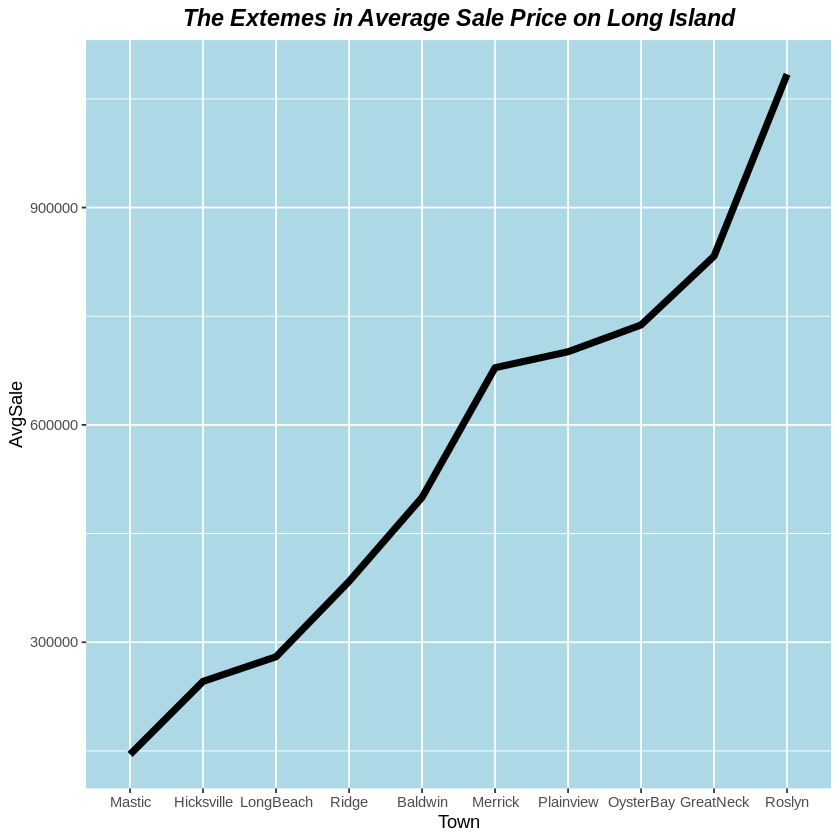

Using the same Y-scale \$100k to \$1 million, here are the rents for  those same towns.

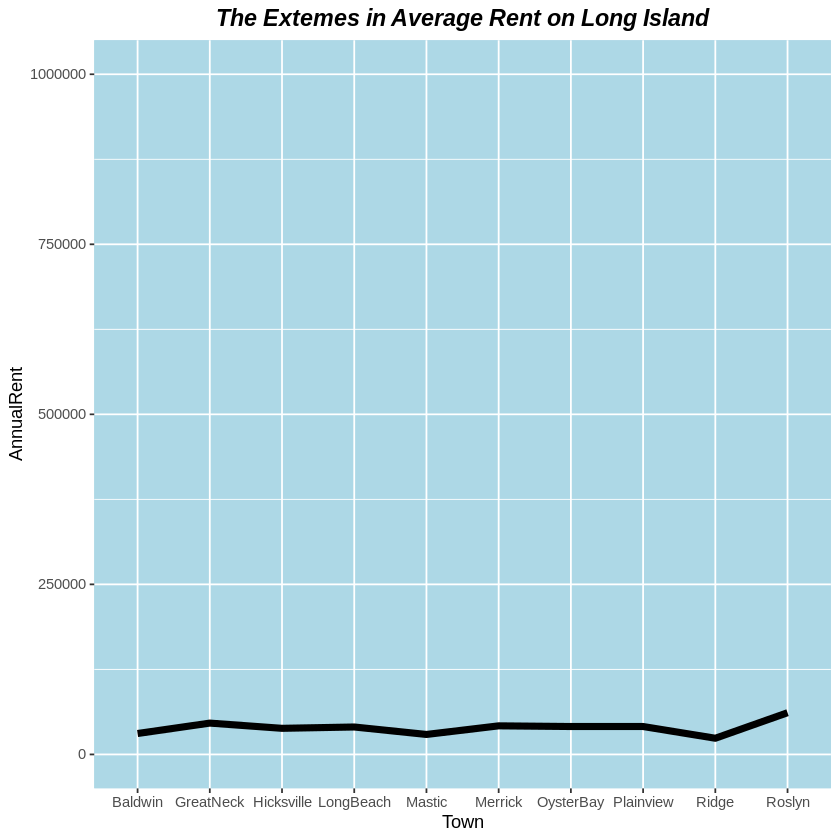

By lowering the Y-axis from \$1 million to \$600k we can see some fluctuation in the rental price  but still , relative to the cost of the house , the average rental price is nearly a straight line.

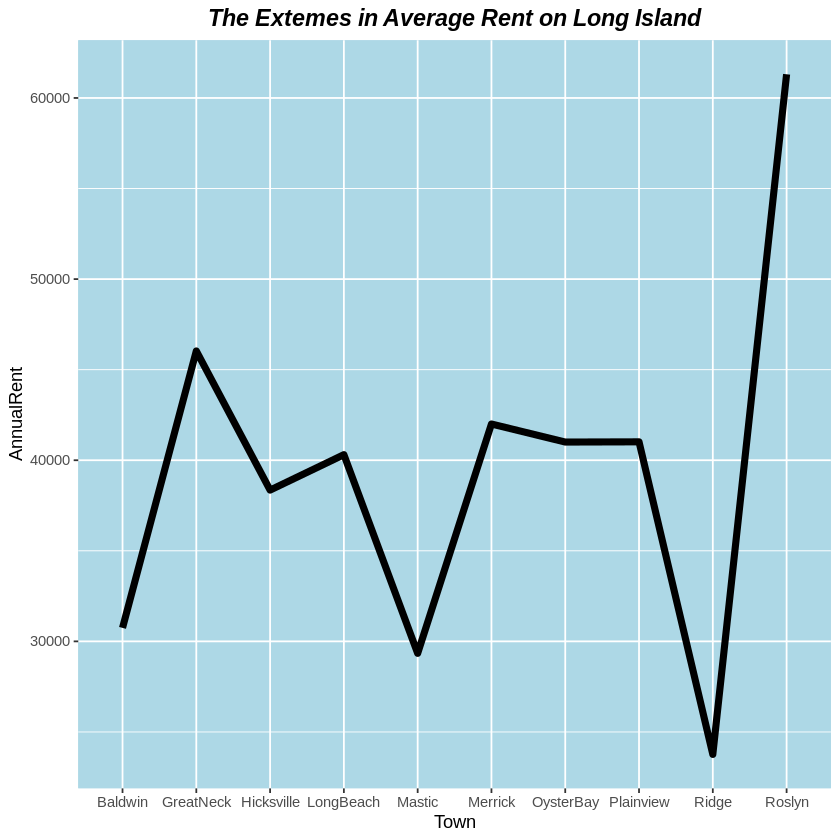

Here the average sale and rental price are contrasted on the same plot.

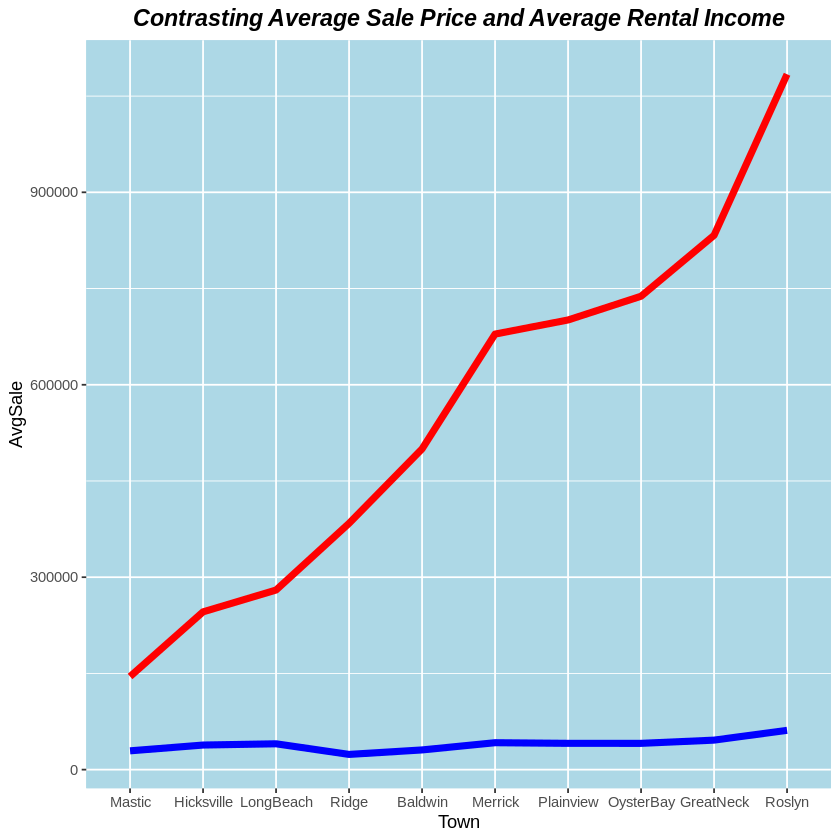

So which town has the highest average Return On Investment?   Mastic.

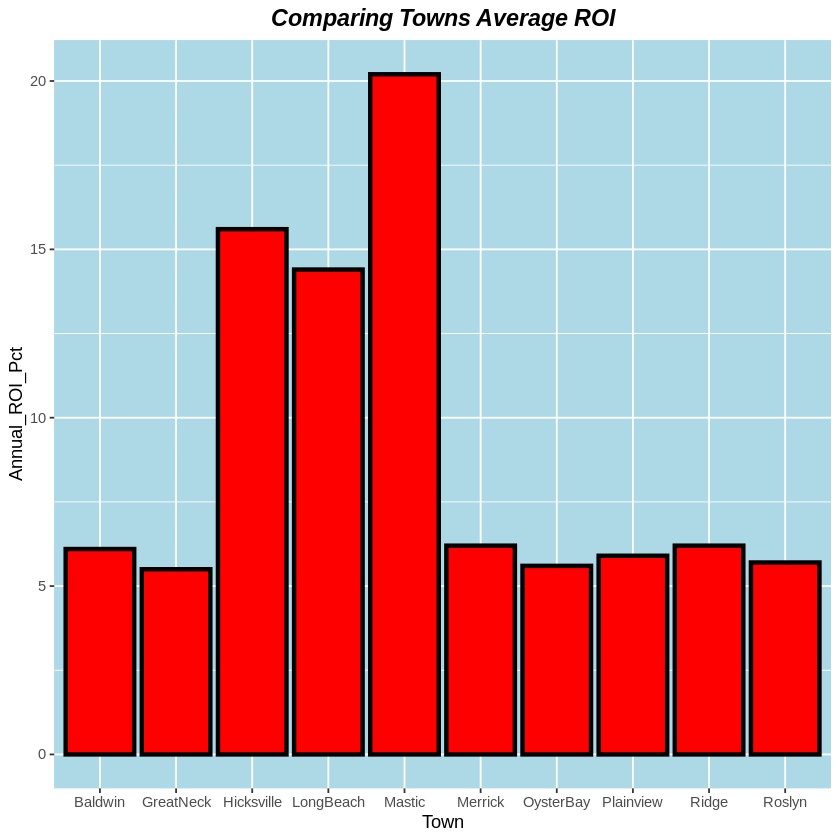

# Conclusion:

The difference in average Return On Investment between towns on Long island is way too great to be ignored.  The upshot is that one should not be distracted by a town's higher average rent.  One should probably buy the least expensive house in the least expensive town becasue the rental income will not be much lower than the most expenxsive home in the most expensive town.



Below is code and the process that were involved.

# The Packages

In [ ]:
library(tidyverse)
library(ggplot2)
#library(ggthemes)

In [ ]:
#install.packages(ggthemes)

In [ ]:
options(scipen = 999)  # this prevents exponential notation from popping 

# The Data

This data came from MLS for the 2020 year. For  purposes of demsonstration there are only a handful of towns represented here.

AvgSale is the average price of the homes that closed in each town.  Similarly for AnnualRent.  What the rent will be for homes where a lease was signed.  Annual ROI is the  AnualRent/AvgSale.

In [ ]:
data<- read.csv("/content/Sales_Rental_Data - Sheet1.csv")

Let us take a look at the data.


In [ ]:
head(data,5)

,Town,AvgSale,MonthlyAvgRent,AnnualRent,Annual_ROI,Annual_ROI.1,Annual_ROI_Pct
,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>
1,Mastic,145200,2445,29340,20.21%,0.202,20.2
2,Roslyn,1084000,5109,61308,5.66%,0.057,5.7
3,GreatNeck,833000,3836,46032,5.53%,0.055,5.5
4,OysterBay,738000,3417,41004,5.56%,0.056,5.6
5,Plainview,701000,3418,41016,5.85%,0.059,5.9


Order them by Average sales price of each town.

In [ ]:
# Re-order the data by AvgSale
data <- data %>% arrange(desc(AvgSale))
head(data,12)

,Town,AvgSale,MonthlyAvgRent,AnnualRent,Annual_ROI,Annual_ROI.1,Annual_ROI_Pct
,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>
1,Roslyn,1084000,5109,61308,5.66%,0.057,5.7
2,GreatNeck,833000,3836,46032,5.53%,0.055,5.5
3,OysterBay,738000,3417,41004,5.56%,0.056,5.6
4,Plainview,701000,3418,41016,5.85%,0.059,5.9
5,Merrick,679000,3500,42000,6.19%,0.062,6.2
6,Baldwin,500000,2562,30744,6.15%,0.061,6.1
7,Ridge,384000,1980,23760,6.19%,0.062,6.2
8,LongBeach,280000,3359,40308,14.40%,0.144,14.4
9,Hicksville,246000,3196,38352,15.59%,0.156,15.6


There is a 7 fold difference in the average sale price between our towns and only about a 3 fold difference in rents.   \$145k v \$1.08 million to buy compared with \$29k v \$61k to rent.

Let us plot them and arrange the towns in ascending order of price.

In [ ]:
data<-data %>%
        dplyr::mutate(Town = factor(Town,
            levels = c("Mastic" , "Hicksville","LongBeach", "Ridge","Baldwin","Merrick", "Plainview", "OysterBay","GreatNeck","Roslyn")))

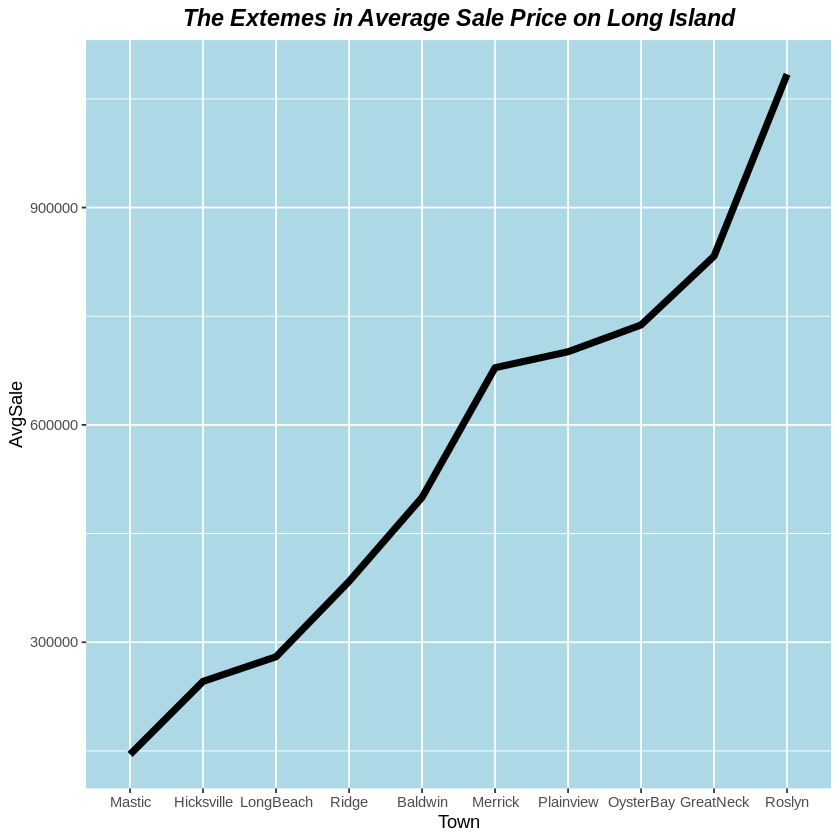

In [ ]:
AvgSale<- ggplot(data,aes(x=Town, y= AvgSale, group = 1))+
  geom_line(size = 2)+
  ggtitle("The Extemes in Average Sale Price on Long Island")+
theme(
  plot.title = element_text( size = 14,face = "bold.italic" ,hjust=0.5 ),
 panel.background = element_rect(fill = "lightblue",
                                colour = "lightblue",
                                size = 0.5, linetype = "solid"))
AvgSale

Compared with the annual rents using the same Y scale.

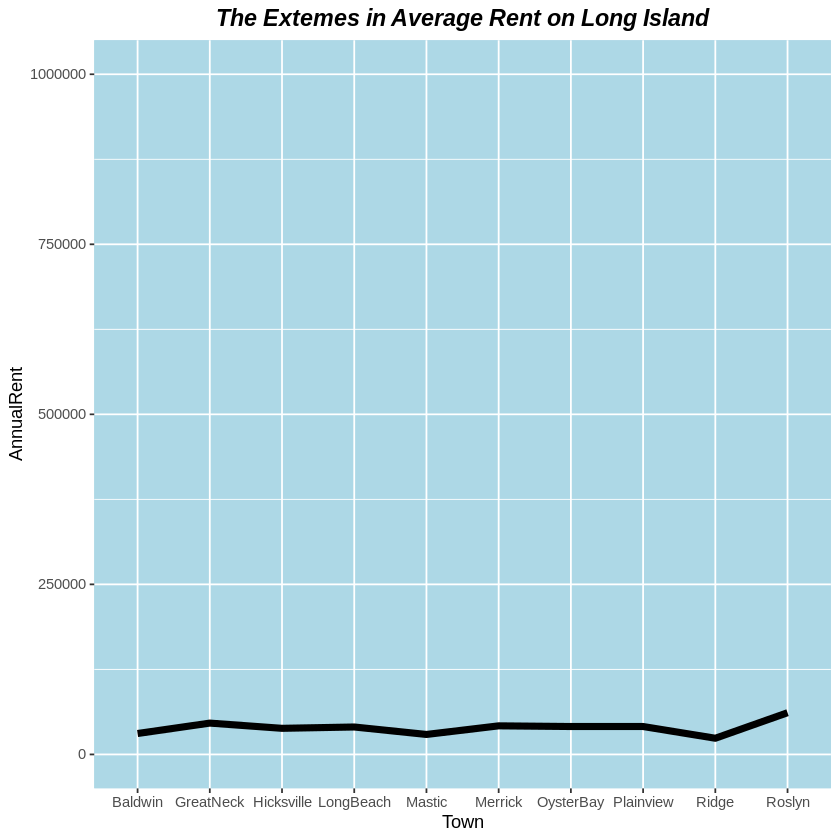

In [ ]:
AvgRents<- ggplot(data,aes(x=Town, y= AnnualRent, group = 1))+
  geom_line(size = 2)+
  ggtitle("The Extemes in Average Rent on Long Island")+
  ylim(0,1000000)+
theme(
  plot.title = element_text( size = 14,face = "bold.italic" ,hjust=0.5 ),
 panel.background = element_rect(fill = "lightblue",
                                colour = "lightblue",
                                size = 0.5, linetype = "solid"))
AvgRents

Let us change the vertical scale from  0 to 1 million dollars to 0 to $6000

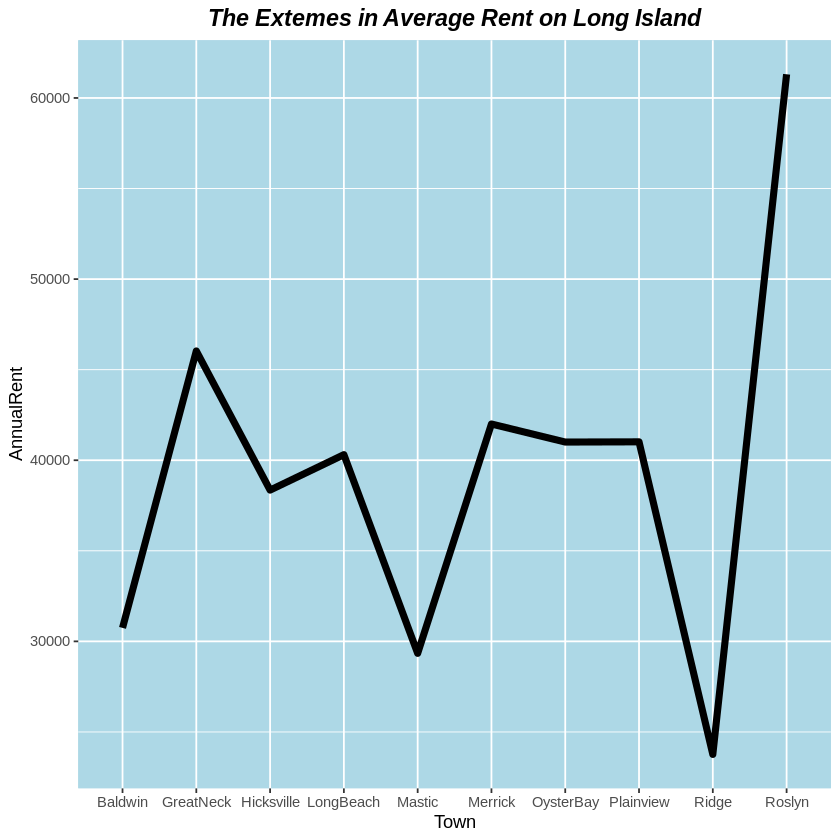

In [ ]:
AvgRents<- ggplot(data,aes(x=Town, y= AnnualRent, group = 1))+
  geom_line(size = 2)+
  ggtitle("The Extemes in Average Rent on Long Island")+
theme(
  plot.title = element_text( size = 14,face = "bold.italic" ,hjust=0.5 ),
 panel.background = element_rect(fill = "lightblue",
                                colour = "lightblue",
                                size = 0.5, linetype = "solid"))
 
AvgRents

In [ ]:
summary(data, digits = 1)

     Town              AvgSale        MonthlyAvgRent   AnnualRent   
 Length:10          Min.   : 145200   Min.   :1980   Min.   :23760  
 Class :character   1st Qu.: 306000   1st Qu.:2720   1st Qu.:32646  
 Mode  :character   Median : 589500   Median :3388   Median :40656  
                    Mean   : 559020   Mean   :3282   Mean   :39386  
                    3rd Qu.: 728750   3rd Qu.:3480   3rd Qu.:41754  
                    Max.   :1084000   Max.   :5109   Max.   :61308  
  Annual_ROI         Annual_ROI.1  Annual_ROI_Pct
 Length:10          Min.   :0.06   Min.   : 6    
 Class :character   1st Qu.:0.06   1st Qu.: 6    
 Mode  :character   Median :0.06   Median : 6    
                    Mean   :0.09   Mean   : 9    
                    3rd Qu.:0.12   3rd Qu.:12    
                    Max.   :0.20   Max.   :20    

The least annual rent is \$23,000 and the most is \$61,000.  Something less than a 3 fold difference.  Meanwhile the least expensive home in 2020 was \$145k and the the most just over \$1 million (This is an odd amount since \$1million triggers the mansion text....)

So what is the **R**eturn **O**n **I**nvestment average per town?

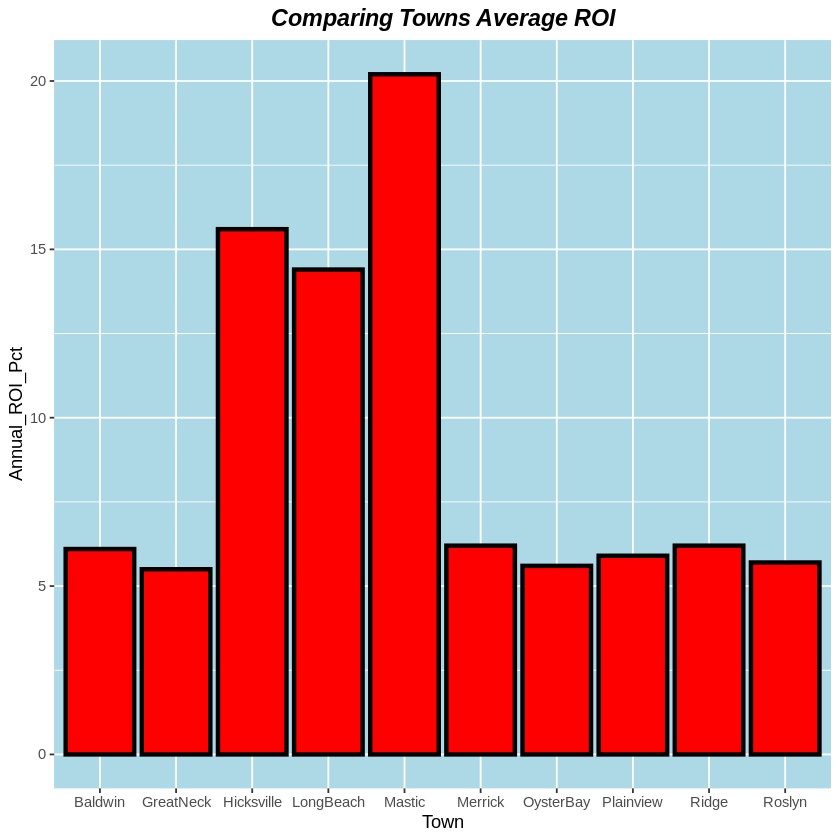

In [ ]:
ROI<- ggplot(data,aes(x=Town, y= Annual_ROI_Pct))+
 geom_bar(stat="identity", color = "black",size = 1.25, fill = "red")+
ggtitle("Comparing Towns Average ROI")+
theme(
  plot.title = element_text( size = 14,face = "bold.italic" ,hjust=0.5 ),
 panel.background = element_rect(fill = "lightblue",
                                colour = "lightblue",
                                size = 0.5, linetype = "solid"))
ROI

Granted the scales are quite different but here are the Average sale prices and the Annual rents on the same plot.

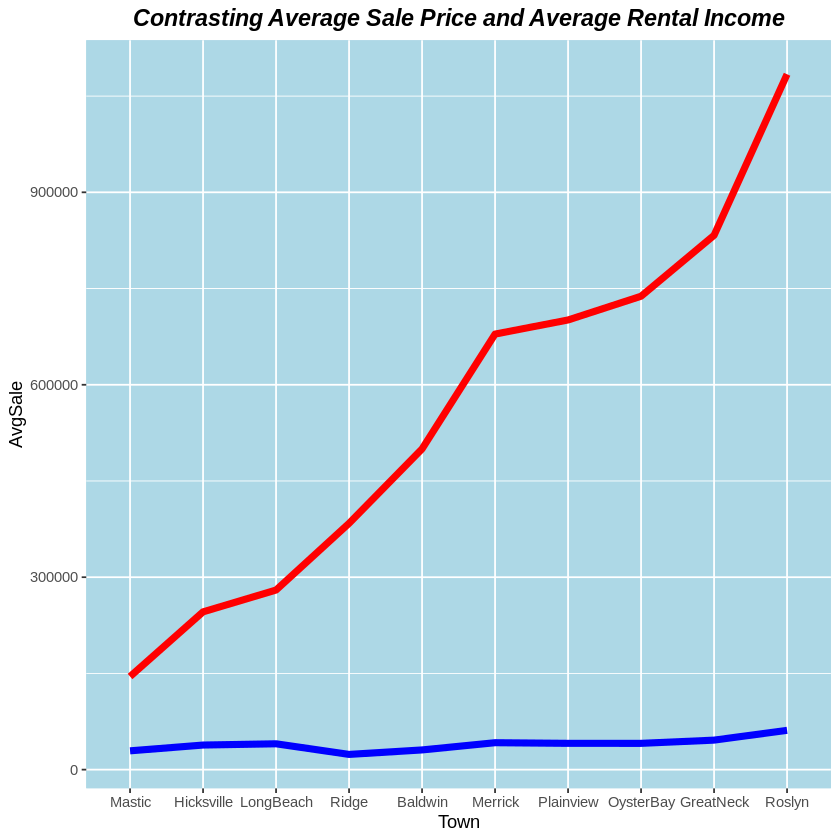

In [ ]:
ggplot(data,aes(x=Town))+
geom_line( aes(y = AvgSale) , color = "red",group=1,size=2)+
geom_line( aes(y= AnnualRent) ,color = "blue" , group = 1,size=2)+
ggtitle("Contrasting Average Sale Price and Average Rental Income")+
theme(
  plot.title = element_text( size = 14,face = "bold.italic" ,hjust=0.5 ),
 panel.background = element_rect(fill = "lightblue",
                                colour = "lightblue",
                                size = 0.5, linetype = "solid"))



    


# Conclusion:

The difference in average Return On Investment between towns on Long island is way too great to be ignored.  The upshot is that one whould not be distracted by a town's higher average rent.  One should probably buy the least expensive house in the least expensive town becasue the rental income will not be much lower than the most expenxsive home in the most expensive town.

